<a href="https://colab.research.google.com/github/KRD-Python/KRD-Python-coursera-test-1a/blob/gh-pages/KMeans%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import sklearn
import matplotlib as mpl 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn import ensemble
import xgboost as xgb
from sklearn.decomposition import PCA
sns.set()
from sklearn.preprocessing import StandardScaler
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import itertools



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


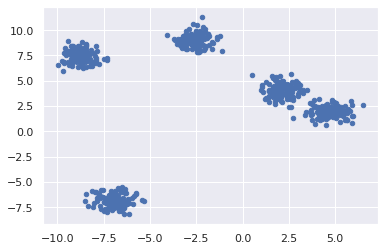

In [14]:
from sklearn.datasets.samples_generator import make_blobs


X,y = make_blobs(n_samples = 600, centers = 5, cluster_std = 0.60, random_state = 42)

plt.scatter(X[:,0], X[:,1], s = 20)

from scipy.cluster.hierarchy import ward, linkage




distance = linkage(X, 'ward')

In [8]:
pip install scipy

NameError: ignored

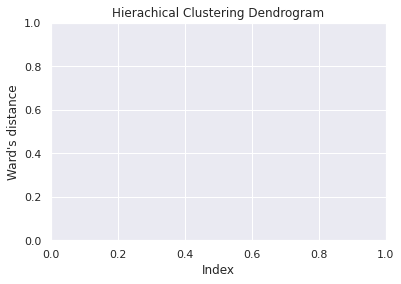

In [4]:
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance, leaf_rotation = 90., leaf_font_size = 9., truncate_mode = 'lastp', p = 6, show_contracted = True)

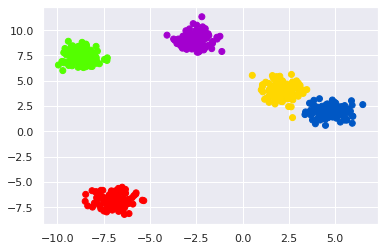

In [19]:
from scipy.cluster.hierarchy import fcluster
distance = linkage(X, 'ward')
max_d = 25
k = 5
cluster = fcluster(distance, k ,
                   criterion = 'maxclust')

plt.scatter(X[:,0], X[:,1], c = cluster, cmap = 'prism')

In [23]:
x = EnsembleVoteClassifier(clf )

TypeError: ignored

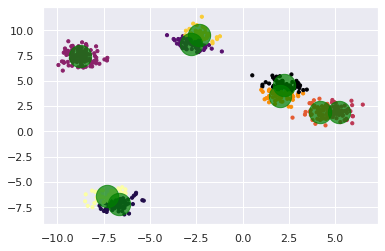

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 9)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


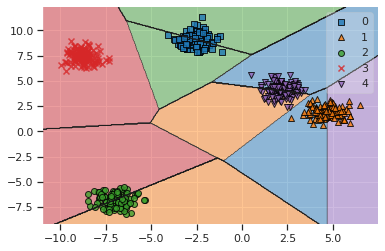

In [32]:
plot_decision_regions(X,y, clf = kmeans)

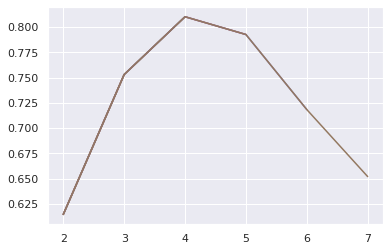

In [37]:
from sklearn.metrics import silhouette_score


kmeans.inertia_

sse_ = []

for k in range(2,8):
  k_means = KMeans(n_clusters = k,).fit(X)
  sse_.append([k, silhouette_score(X, k_means.labels_)])

  plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

In [39]:
from sklearn.cluster import MeanShift, estimate_bandwidth

from itertools import cycle

bandwidth_X = estimate_bandwidth(X, quantile = 0.1, n_samples = len(X))

meanshift = MeanShift(bandwidth = bandwidth_X, bin_seeding = True)
meanshift.fit(X)


MeanShift(bandwidth=0.9946702350329211, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

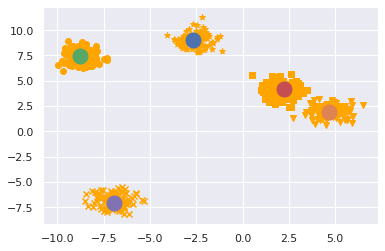

In [42]:
markers = '*vosx'
labels = meanshift.labels_
num_clusters = len(np.unique(labels))
cluster_centers = meanshift.cluster_centers_
for i, marker in zip(range(num_clusters), markers):
  plt.scatter(X[labels ==i, 0], X[labels ==i, 1], marker = marker, color = 'orange')
  cluster_center = cluster_centers[i]
  plt.plot(cluster_center[0], cluster_center[1], marker = 'o', markersize = 15)